In [141]:
import os 
import cv2
import numpy as np
from tqdm import tqdm
from csv import reader
import pandas as pd
import math

REBUILD_DATA = True


In [142]:
Path = r"E:\scovedata\mülakat_dosya\labeled-data"
IMG_Path =r"E:\scovedata\mülakat_dosya"
csv_fn="CollectedData_scovec.csv"

class Prepare_CSV():
    def __init__(self):
        self.df = []
        

    def read_data(self,path):
        self.df = []
        self.df = pd.read_csv(path)


    def filter_data(self,path):
        self.df = self.df[2:].reset_index(drop=True)
        self.df = self.df.dropna().reset_index(drop=True)
        self.change_columns()
        return self.df
        

    def change_columns(self):
        self.df=self.df.rename(columns={'scorer': 'path', 'scovec': 'body_top_x','scovec.1': 'body_top_y','scovec.2': 'tail_start_x','scovec.3': 'tail_start_y',
        'scovec.4' : 'tail_mid_x', 'scovec.5': 'tail_mid_y', 'scovec.6': 'tail_end_x', 'scovec.7': 'tail_end_y'})
    

In [143]:
class prepare_image():
    def __init__(self):
        pass


    def crop_image(self,path,x,y,x2,y2):

        self.angle = None
        self.img = cv2.imread(path)
        self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        self.copy = self.img.copy()

        w = abs(x2-x)
        h = abs(y2-y)


        if x>x2:
            self.img = self.img[y:y+h,x-w:x]

        else:
            self.img = self.img[y:y+h,x:x+w]
        
        
        
        
        
        try:
            self.img = cv2.resize(self.img,(50,50))
            
        
        except:
            print("resize error at {}".format(path))
            #print("Shapes original{} and copy{}".format(self.img.shape,self.copy.shape))
            #print("Coordinates {} and {}, width {} and height {}".format(x,y,w,h))
            #print("tail end x {} and y {}".format(x2,y2))
            #print("Skipped")
            return None, None
        
        self.get_angle(x,y,x2,y2)

        return self.img,self.angle

    def get_angle(self,x,y,x2,y2):

        if x>x2:
            if y2>y:
                self.angle = 1
            else:
                self.angle = 0
        else:
            if y2>y:
                self.angle = 1
            else:
                self.angle = 0


        

In [144]:
class assign_data():
    def __init__(self):
        pass

    def assign_coordinates(self,df):
        self.df = df
        path = self.df["path"][j]
        body_top_x = int(float(self.df["body_top_x"][j]))
        body_top_y = int(float(self.df["body_top_y"][j]))
        tail_start_x = int(float(self.df["tail_start_x"][j]))
        tail_start_y = int(float(self.df["tail_start_y"][j]))
        tail_mid_x = int(float(self.df["tail_mid_x"][j]))
        tail_mid_y = int(float(self.df["tail_mid_y"][j]))
        tail_end_x = int(float(self.df["tail_end_x"][j]))
        tail_end_y = int(float(self.df["tail_end_y"][j]))

        return path, body_top_x, body_top_y, tail_start_x, tail_start_y, tail_mid_x, tail_mid_y, tail_end_x, tail_end_y


In [145]:
class LabelData():
    def __init__(self):
        self.training_data = []
        self.up_counter = 0
        self.down_counter = 0

    
    def label_image(self,img,up_or_down):

        # up == 0 , down == 1

        if up_or_down == 0:
            self.up_counter +=1
        else:
            self.down_counter +=1
        
        self.training_data.append([np.array(img),np.eye(2)[up_or_down]])
        return self.training_data

    def shuffle_and_save(self):
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("Saved")
        print({'up tail ':self.up_counter,'down tail':self.down_counter})

In [146]:

if REBUILD_DATA == True:

    preparedata_obj = Prepare_CSV()
    preparecoordinates = assign_data()
    preprocess_obj = prepare_image()
    label_obj = LabelData()

    counter = 0
    skipped = 0
    for i in range(1,25):
        path = Path + f"\\tail{i}\\"+csv_fn
        preparedata_obj.read_data(path)
        filtered_data=preparedata_obj.filter_data(path)


        for j in range(len(filtered_data["path"])):
            path, body_top_x, body_top_y, tail_start_x, tail_start_y, tail_mid_x, tail_mid_y, tail_end_x, tail_end_y = preparecoordinates.assign_coordinates(filtered_data)

            img,angle = preprocess_obj.crop_image(path,tail_start_x,tail_start_y,tail_end_x,tail_end_y)

            try:
                cv2.imwrite(f"crop-frames\\abo-{i}-{j}.jpg",img)
            except:
                if img == None:
                   print("Corrupted image at {}".format(path))
                   print("Skipped")
                   skipped +=1
                   continue

            training_data = label_obj.label_image(img,angle)
            
            

            counter += 1



        
    label_obj.shuffle_and_save()

    print("Total images {}, Total skipped images {}".format(counter,skipped))
    


        #img = img.astype(np.float32)
        #img = img/255.0
        #img = img.reshape(1,224,224,3)
        #filtered_data["img"][j] = img
        
        
    

resize error at labeled-data\tail11\img079.png
Corrupted image at labeled-data\tail11\img079.png
Skipped
resize error at labeled-data\tail12\img122.png
Corrupted image at labeled-data\tail12\img122.png
Skipped
resize error at labeled-data\tail12\img643.png
Corrupted image at labeled-data\tail12\img643.png
Skipped
resize error at labeled-data\tail13\img139.png
Corrupted image at labeled-data\tail13\img139.png
Skipped
resize error at labeled-data\tail22\img218.png
Corrupted image at labeled-data\tail22\img218.png
Skipped
resize error at labeled-data\tail24\img127.png
Corrupted image at labeled-data\tail24\img127.png
Skipped
resize error at labeled-data\tail24\img200.png
Corrupted image at labeled-data\tail24\img200.png
Skipped
Saved
{'up tail ': 143, 'down tail': 267}
Total images 410, Total skipped images 7


C:\Users\emrea\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


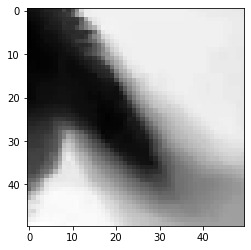

In [151]:
sample = np.load("training_data.npy",allow_pickle=True)


import matplotlib.pyplot as plt

plt.imshow(sample[77][0],cmap="gray")
plt.show()